# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nicholas Baron Bramantyo
- **Email:** nicho.bram@gmail.com
- **ID Dicoding:** baron_bram

## Menentukan Pertanyaan Bisnis

- Bagaimana pergerakan registered user selama pada 2011-2012?
- Bagaimana jumlah casual users selama 2011-2012?

## Import Semua Packages/Library yang Digunakan

## Data Wrangling

In [27]:

import pandas as pd
import matplotlib.pyplot as plt

### Gathering Data

In [28]:
day_df = pd.read_csv("https://raw.githubusercontent.com/BaronBram/ProyekAnalisisData/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/BaronBram/ProyekAnalisisData/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [30]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [33]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [34]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [35]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [36]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [37]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [38]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [39]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [40]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [41]:
day_df.groupby(by="dteday").agg({
    "temp": ["max", "min"],
    "hum":["max", "min"]
})

temp                 hum          
                 max       min       max       min
dteday                                            
2011-01-01  0.344167  0.344167  0.805833  0.805833
2011-01-02  0.363478  0.363478  0.696087  0.696087
2011-01-03  0.196364  0.196364  0.437273  0.437273
2011-01-04  0.200000  0.200000  0.590435  0.590435
2011-01-05  0.226957  0.226957  0.436957  0.436957
...              ...       ...       ...       ...
2012-12-27  0.254167  0.254167  0.652917  0.652917
2012-12-28  0.253333  0.253333  0.590000  0.590000
2012-12-29  0.253333  0.253333  0.752917  0.752917
2012-12-30  0.255833  0.255833  0.483333  0.483333
2012-12-31  0.215833  0.215833  0.577500  0.577500

[731 rows x 4 columns]

In [42]:
hour_df.groupby(by="dteday").agg({
    "hr": ["max", "min"],
    "temp": ["max", "min"],
    "hum":["max", "min"]
})

hr      temp         hum      
           max min   max   min   max   min
dteday                                    
2011-01-01  23   0  0.46  0.20  0.94  0.72
2011-01-02  23   0  0.46  0.22  1.00  0.39
2011-01-03  23   0  0.26  0.14  0.69  0.30
2011-01-04  23   0  0.30  0.12  0.74  0.48
2011-01-05  23   0  0.30  0.16  0.74  0.28
...         ..  ..   ...   ...   ...   ...
2012-12-27  23   0  0.30  0.24  0.93  0.49
2012-12-28  23   0  0.30  0.22  0.70  0.49
2012-12-29  23   0  0.30  0.20  1.00  0.56
2012-12-30  23   0  0.34  0.20  0.61  0.36
2012-12-31  23   0  0.28  0.14  0.69  0.44

[731 rows x 6 columns]

In [43]:
day_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.265833    5
0.635000    5
0.680000    4
0.710833    4
0.649167    4
           ..
0.390000    1
0.389167    1
0.389091    1
0.384348    1
0.861667    1
Name: instant, Length: 499, dtype: int64

In [44]:
day_df.groupby(by="hum").instant.nunique().sort_values(ascending=False)

hum
0.613333    4
0.741250    3
0.630833    3
0.483333    3
0.722917    3
           ..
0.562083    1
0.561765    1
0.561667    1
0.560833    1
0.972500    1
Name: instant, Length: 595, dtype: int64

In [45]:
hour_df.groupby(by="hr").instant.nunique().sort_values(ascending=False)

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\nicho\AppData\Local\Temp\ipykernel_18656\3728527117.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily = day_df.resample(rule='M', on='dteday').agg({


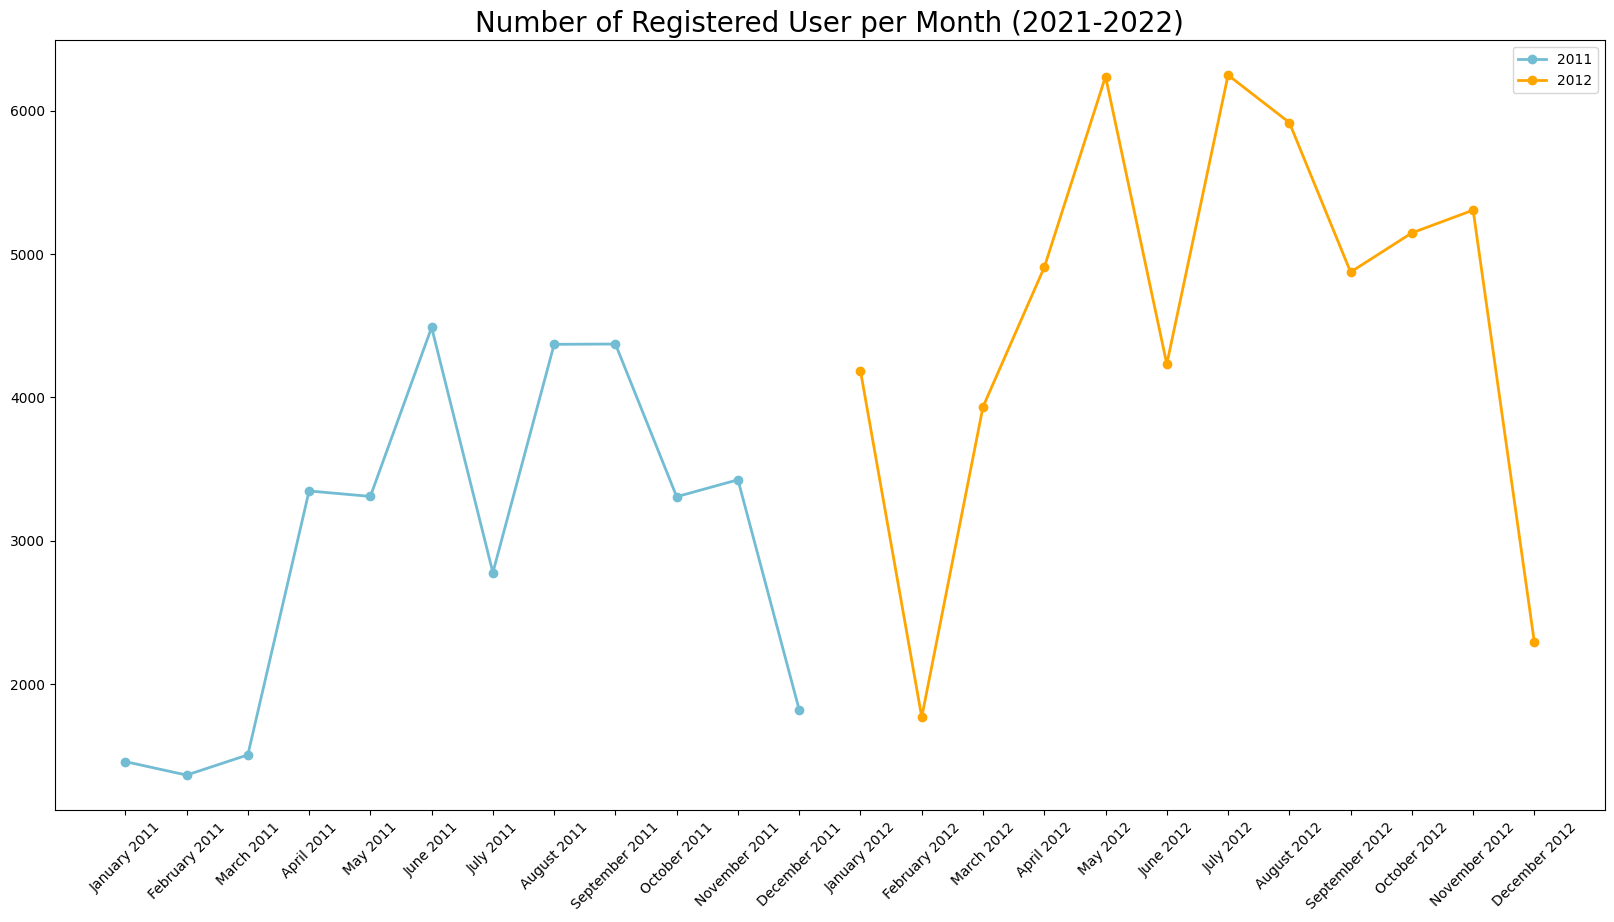

In [46]:
daily = day_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "registered": "last"
})
daily.index = daily.index.strftime('%B %Y')
daily = daily.reset_index()

# Separate data for 2011 and 2012
daily_2011 = daily[daily['dteday'].str.contains('2011')]
daily_2012 = daily[daily['dteday'].str.contains('2012')]

plt.figure(figsize=(20, 10)) 
# Plot data for 2011
plt.plot(daily_2011.index, daily_2011["registered"], marker='o', linewidth=2, color="#72BCD4", label='2011') 

# Plot data for 2012
plt.plot(daily_2012.index, daily_2012["registered"], marker='o', linewidth=2, color="#FFA500", label='2012') 

plt.title("Number of Registered User per Month (2021-2022)", loc="center", fontsize=20) 
plt.xticks(ticks=range(len(daily)), labels=daily["dteday"], rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend()
plt.show()

### Pertanyaan 2:

C:\Users\nicho\AppData\Local\Temp\ipykernel_18656\1064109469.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily = day_df.resample(rule='M', on='dteday').agg({


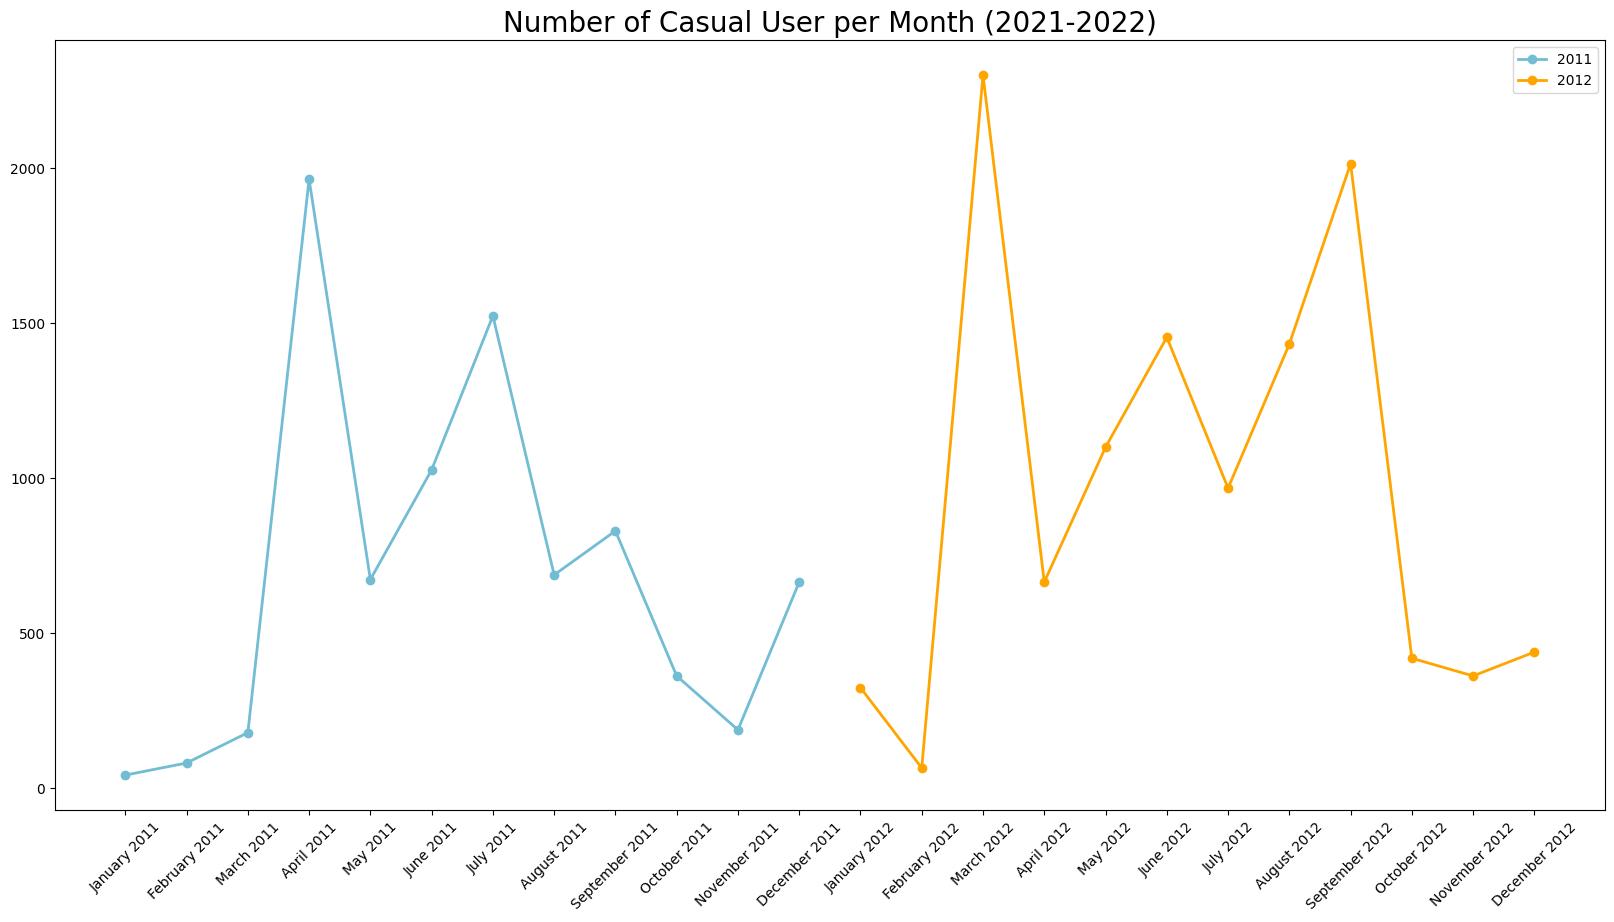

In [47]:
daily = day_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "casual": "last"
})
daily.index = daily.index.strftime('%B %Y')
daily = daily.reset_index()

# Separate data for 2011 and 2012
daily_2011 = daily[daily['dteday'].str.contains('2011')]
daily_2012 = daily[daily['dteday'].str.contains('2012')]

plt.figure(figsize=(20, 10)) 
# Plot data for 2011
plt.plot(daily_2011.index, daily_2011["casual"], marker='o', linewidth=2, color="#72BCD4", label='2011') 

# Plot data for 2012
plt.plot(daily_2012.index, daily_2012["casual"], marker='o', linewidth=2, color="#FFA500", label='2012') 

plt.title("Number of Casual User per Month (2021-2022)", loc="center", fontsize=20) 
plt.xticks(ticks=range(len(daily)), labels=daily["dteday"], rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend()
plt.show()

In [48]:
day_df.to_csv("day_data.csv", index=False)

## Conclusion

- Conclucion pertanyaan 1
Pergerakan registered user pada 2011 terdapat kenaikan yang cukup tajam pada maret ke April 2011. Selain itu kenaikan yang signifikan terjadi pada Mei ke Juni 2011 dan Juli ke Agustus 2011. Sementara terjadi penurunan pada Mei ke Juni 2011, lalu pada September ke Oktober 2011 dan November ke Desember 2011.

Pada tahun 2012, terjadi kenaikan registered user pada Februari-Mei 2011 lalu kenaikan kembali terjadi pada Juni - Juli 2012. Lalu sempat terjadi penurunan jumlah registered user pada januari-Februari 2012, Mei-Juni 2012, Juli- September 2012 dan terjadi penurunan yang cukup tajam pada November-Desember 2012.

Conclucion pertanyaan 2
Pada 2011, terjadi kenaikan yang signifikan pada Maret - April 2011, lalu terjadi penurunan pada April - Mei 2011. Kenaikan kembali terjadi pada Mei - Juli 2012 dan mengalami penurunan kembali pada Bulan Agustus 2012. Penurunan kembali terjadi pada September - November 2011 dan kembali naik pada Desember 2011. 

Pada 2012, terjadi kenaikan yang signifikan pada Februari - Maret 2012, lalu disusul penurunan pada Maret - April 2012. Setelah itu, kembali naik pada April - Juni 2012. Terjadi penurunan pada Juni - Juli 2012, lalu kembali naik pada Juli - September 2012. Setelah itu, terjadi penurunan yang signifikan pada September - Oktober 2012.
